# Estimation of PCA fitting for conversion from ZTE/PETRA to pseudo CT

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import Code
import sys
%matplotlib inline
from os.path import join as jn

StaggeredFDTD_3D_CPU loaded
StaggeredFDTD_3D_CUDA NOT loaded
StaggeredFDTD_3D_OPENCL loaded
StaggeredFDTD_3D_METAL loaded
loading /Users/spichardo/miniconda3/envs/BabelJup2/lib/python3.9/site-packages/BabelViscoFDTD/tools/libBabelMetal.dylib
loaded Metal <CDLL '/Users/spichardo/miniconda3/envs/BabelJup2/lib/python3.9/site-packages/BabelViscoFDTD/tools/libBabelMetal.dylib', handle ef137730 at 0x169925a60>
mkl_fft not available


# Step 1 - define inputs
* `BasePath`: Path to root directory where **T1W.nii.gz**, **ZTE.nii.gz** and **CT.nii.gz** files are located. **Be sure files are named exaclty like this**.
* `simbnibs_path` : Path to SimNIBS charm's output dir, it must be under BasePath
* `Mat4Trajectory` : Path to trajectory file exported from Brainsight. Be sure of calling **Target.txt**
* `ComputingDevice` : Type of processor in your computer, either M1, M2, M3 or M4 (no need to add max or pro monikers)
* `ID`' : ID for files, keep it with the value of **Target**
* `ZTE` : Path to ZTE or PETRA file, the file itself must be named **ZTE.nii.gz** regardless it is a ZTE or PETRA scan.
* `CTType` : Type of scan, use 2 for ZTE and 3 for PETRA

In [3]:
BasePath='./DATA/ID_0068/'
simbnibs_path=jn(BasePath,'m2m_ID_0068')
Mat4Trajectory=jn(BasePath,'Target.txt')
ComputingDevice='M3'
ID = 'Target'

ZTE=jn(BasePath,'ZTE.nii.gz') #use always ZTE.nii.gz as file name regardless if ZTE o PETRA

CTType =2 # 2 = ZTE, 3 = PETRA ; CHANGE accordingly

# We instantiate the class
P=Code.Processing(BasePath,
                      ID,
                      simbnibs_path,
                      Mat4Trajectory,
                      ComputingDevice=ComputingDevice,
                      ZTE=ZTE,
                      CTType=CTType)

Selecting device:  Apple M3 Max


---
# Step 2: Run BabelBrain step 1 to generate files we will need for the processing
#### The code below will do the same process that is being called in Step 1 of the BabelBrain's GUI

In [4]:
#REFERENCE
P.Run_mask_creation(bForceRecalculate=False)


****************************************
***** Calculating mask.. BE PATIENT... it can take a couple of minutes...
****************************************
GetSmallestSOS 1102.5149999999999
3 M3 {'SimbNIBSDir': './DATA/ID_0068/m2m_ID_0068', 'SimbNIBSType': 'charm', 'CoregCT_MRI': True, 'TrajectoryType': 'brainsight', 'Mat4Trajectory': './DATA/ID_0068/Target.txt', 'T1Source_nii': './DATA/ID_0068/T1W.nii.gz', 'T1Conformal_nii': './DATA/ID_0068/T1W.nii.gz', 'SpatialStep': 0.368, 'Location': [0, 0, 0], 'prefix': 'Target_H317_500kHz_6PPW_', 'bPlot': False, 'ElastixOptimizer': 'FiniteDifferenceGradientDescent', 'CT_or_ZTE_input': './DATA/ID_0068/ZTE.nii.gz', 'CTType': 2, 'ZTERange': [0.1, 0.65], 'HUThreshold': 300.0}
sys.platform darwin
Selecting device:  Apple M3 Max
Selecting device:  Apple M3 Max
Selecting device:  Apple M3 Max
Selecting device:  Apple M3 Max
Selecting device:  Apple M3 Max
Starting Masking Process
baseaffine [[ 9.99244630e-01  3.10200714e-02  2.32599508e-02 -9.88399200e+

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


totalPoints 3150845
globalcount [3150845       0]
Code block 'voxelization ' took: 0.92214 s
baseaffine [[ 3.67722024e-01  3.10200714e-02  2.32599508e-02 -3.89032016e+01]
 [-2.58814972e-02  3.60769618e-01 -1.95549592e-01 -4.36898667e+01]
 [-2.88688075e-02  1.94800451e-01  3.60793812e-01  3.12890839e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
RMat4 [[-0.3677056 -0.011408   0.0085744  0.       ]
 [ 0.0095312 -0.3607872 -0.071944   0.       ]
 [ 0.0106352 -0.0716864  0.3607872  0.       ]
 [ 0.         0.         0.         1.       ]]
baseaffineRot [[-0.3677056 -0.011408   0.0085744  0.       ]
 [ 0.0095312 -0.3607872 -0.071944   0.       ]
 [ 0.0106352 -0.0716864  0.3607872  0.       ]
 [ 0.         0.         0.         1.       ]]
GPU Voxelizing # triangles 487194
spatial step and  maximal grid dimensions [0.27580652 0.27598864 0.27581204] 521 724 764
totalPoints 99422164
globalcount [99422164        0]
Code block 'skull voxelization' took: 0.75391 s
GPU V

---
# Step 3 - Run coregistration from CT to pseudo CT space (T1W space)

In [5]:
P.RunElastix('FiniteDifferenceGradientDescent',bCToMRI=True)

"/Users/spichardo/Documents/GitHub/BabelBrain/BabelBrain/ExternalBin/elastix/run_mac.sh" "./DATA/ID_0068/ZTE_BiasCorrec_pCT.nii.gz" "./DATA/ID_0068/CT.nii.gz" "elastix_output" "elastix_output/inputparam.txt"
/Users/spichardo/Documents/GitHub/BabelBrain/BabelBrain/ExternalBin/elastix
elastix ended with code  0


----
#### Verify in fsleyes or other tool that the files `CT_in_T1W.nii.gz` and `ZTE_BiasCorrec_pCT.nii.gz` are correctly coregistered

# Step 4 - Run analysis of  pseudo CT with the default values
#### This will give us some initial assessment
**Important**: Adjust **LineSep** value to show only the upper part of the skull.

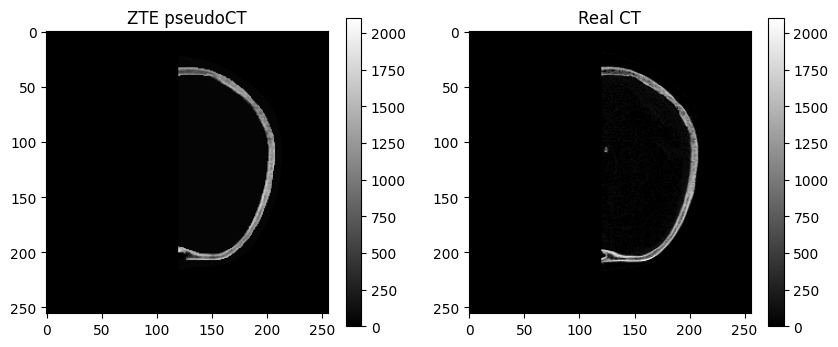

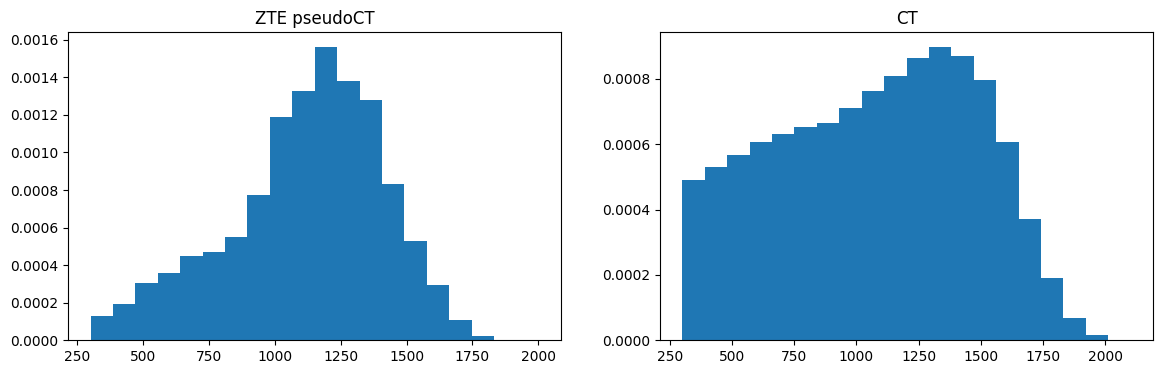

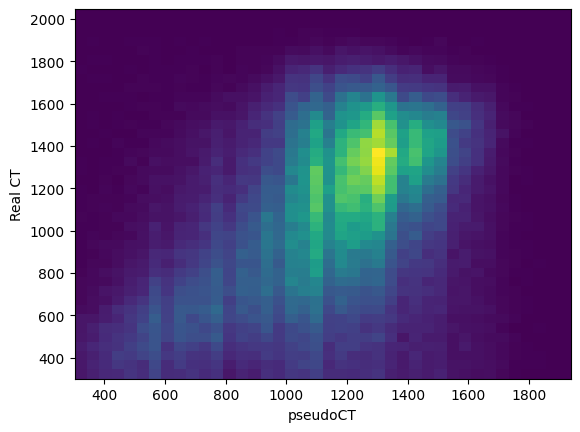

In [6]:
P.ShowFirstPart(LineSep=120)

# Step 5 - Run PCA processing to find new fitting formula
#### Adjust ZTERange to be sure only the skull region is segmented


 New PCA fitting [-2882.98850414  2711.5227993 ]


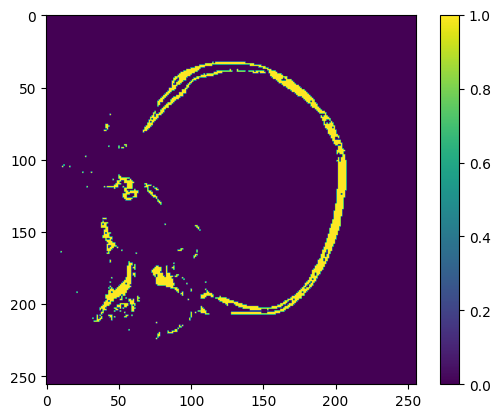

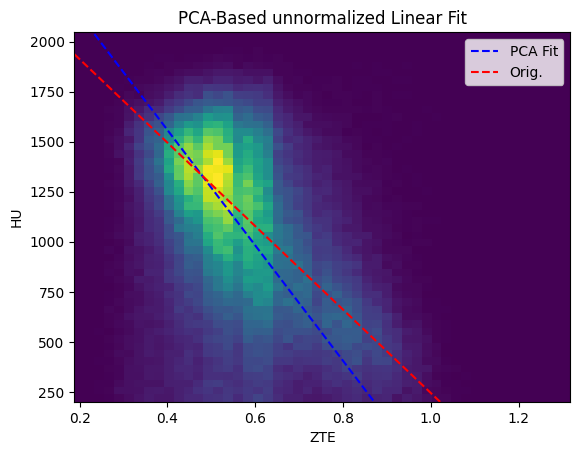

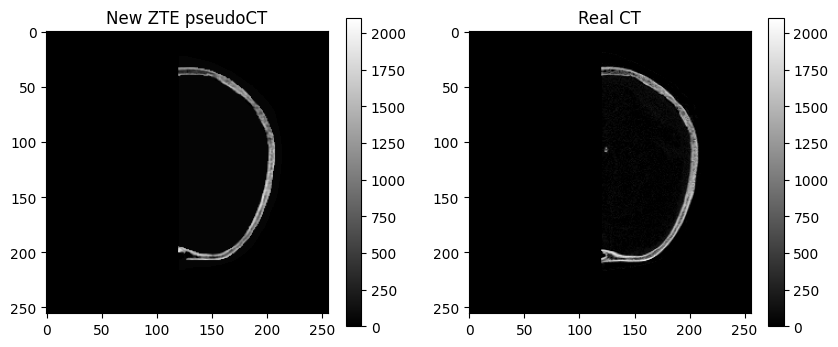

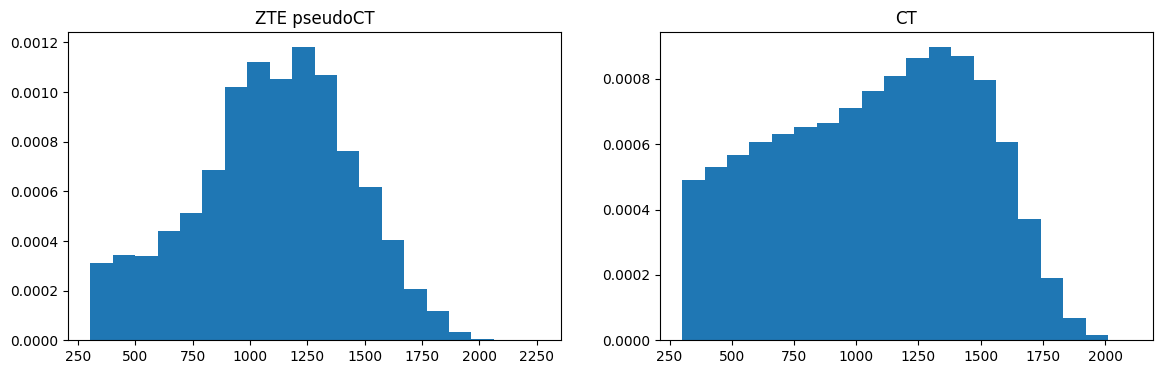

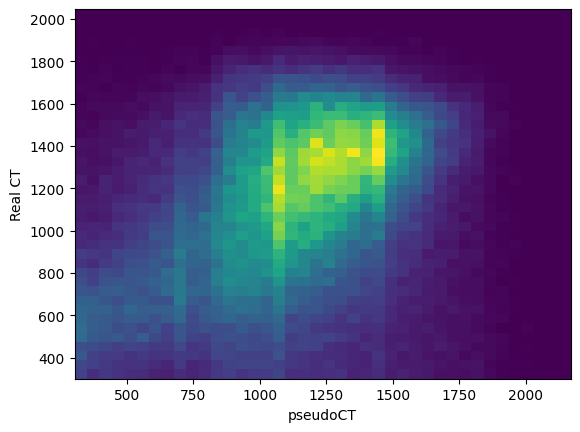

In [7]:
P.ProcessMRI(ZTERange=[0.1,0.65])